In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Úloha 1 - Vzdálenost a zrychlení prvního stupně rakety Falcon 9

Data k této úloze jsou převzata z tohoto [vlákna](https://www.reddit.com/r/spacex/comments/68onuw/nrol76_first_stage_telemetry_data/) na sociální síti Reddit. Uživatel tossha si dal tu práci, aby z vysílání vzletu rakety Falcon 9 (kontkrétně NROL-76) získal data o výšce a rychlosti prvního stupně rakety. V této úloze si z dat o rychlosti rakety vykreslíme závislost polohy a zrychlení na čase pomocí základní numerické integrace a derivace.

In [2]:
#importování dat (jen první řtyři sloupce, Snímek )

telemetry_data = pd.read_csv("NROL-76 F9 first stage telemetry data - Data.csv", usecols=["Frame", "Speed", "Altitude", "Time"])

#zdroj dat:
# https://www.reddit.com/r/spacex/comments/68onuw/nrol76_first_stage_telemetry_data/
# https://docs.google.com/spreadsheets/d/1ihRLDqwy95p-Y0bJ9YGfjQTt5ZRgwCu7xzmJ3fdRguo/edit?gid=0#gid=0

Popis načtených dat:
- Frame - pořadové číslo snímku vysílání ze kterého byla data získána,
- Speed $v$ [$\frac{\text{m}}{\text{s}}$] - aktuální rychlost rakety,
- Altitude $y$ [km] - aktuální výška rakety,
- Time $t$ [s] - čas 

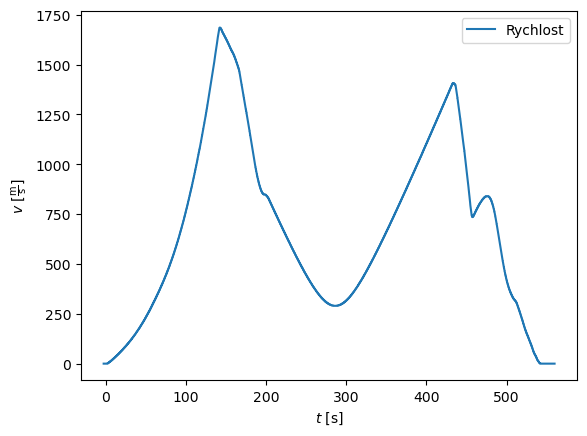

In [3]:
#graf rychlosti v závislosti na čase

plt.plot(telemetry_data["Time"], telemetry_data["Speed"], label = "Rychlost")
plt.xlabel("$t$ [s]")
plt.ylabel(r"$v$ [$\frac{\text{m}}{\text{s}}$]")

plt.legend()

## Vzdálenost uražená prvním stupněm rakety Falcon 9

Kód níže je jeden z příkladů jednoduché integrace. Naši práci si zjednoduššíme tím předopkladem, že rychlost v jednom časovém intervalu je konstantní. Co to znamená? Po dobu časového intervalu $\Delta t_i = t_i - t_{i-1}$ předopkldádáme, že rychlost rakety je konstatní o velikosti $v_i$ (graf rychlosti bude tvořit schody, které jsou na obrázku níže). Díky tomu můžeme vypočítat vzdálenost $d_i$, kterou raketa urazila za časový úsek $\Delta t_i$ pomocí známeho vzorce

\begin{equation*}
    d_i = v_i \cdot \Delta t_i = v_i \cdot (t_{i}-t_{i-1}).
\end{equation*}

Pokud známe vzdálenost uraženou ve všech časových intervalech $\Delta t_i$, tak prostým součtem těchto vzdáleností $d_i$ dokážeme zjistit i celkovou vzdálenost $d$, kterou raketa urazila. 

\begin{equation*}
    d = \sum_i d_i = \sum_i v_i \cdot (t_{i}-t_{i-1}).
\end{equation*}


Totéž si můžeme ukázat i pomocí obrázku níže, který ukazuje graf rychlosti, na který jsme aplikovali náš předpoklad konstantnosti rychlosti v časových intervalech. Uražená vzdálenost rakety se rovná ploše pod křivkou rychlosti. Všimněte si, že "schody" se na grafu se liší svou šířkou. To je dáno tím, jakým zplůsobem byla data získána z vide z přenosu vzletu rakety. Pro naše účely různá šířka techto "schodů" není problém nebudeme se mu nadále věnovat. 

![01_schody.png](01_schody.svg)

<!-- 
Nyní si 

The code below is one of the simpliest example of integration. We assume that in each time interval the speed of the rocket is constant. We can then caculate the distance travelled by the object using 

\begin{equation*}
    d_i = v_i \cdot \Delta t_i
\end{equation*}

for each time interval $\Delta t_i$ (where time interval $\Delta t_i = t_{i}-t_{i-1}$ and $v_i$ is the speed of the object in that time interval). If we know the distance traveled by the object in each time interval $\Delta t$ we can then sum all of the distances to arrive at the total distance -->



In [4]:
#Numerická integrace tzv. schodů

telemetry_data["Distance"] = 0      #Vytvoření nového sloupce pro utrženou vzdálenost


for i in range(1,len(telemetry_data)):      #Vypočtení uražené vzdálenosti v každém časovém úseku
    telemetry_data.loc[i, "Distance"] = telemetry_data.loc[i, "Speed"]*(telemetry_data.loc[i, "Time"]-telemetry_data.loc[i-1, "Time"]) + telemetry_data.loc[i-1, "Distance"]        #Vypočtenou vzdálenost úseku zorvna přičteme k celkové vzdálenosti a zapíšeme do sloupce Distance (vzdálenost)

/tmp/ipykernel_501/392795713.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.029999999999999805' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  telemetry_data.loc[i, "Distance"] = telemetry_data.loc[i, "Speed"]*(telemetry_data.loc[i, "Time"]-telemetry_data.loc[i-1, "Time"]) + telemetry_data.loc[i-1, "Distance"]        #Vypočtenou vzdálenost úseku zorvna přičteme k celkové vzdálenosti a zapíšeme do sloupce Distance (vzdálenost)


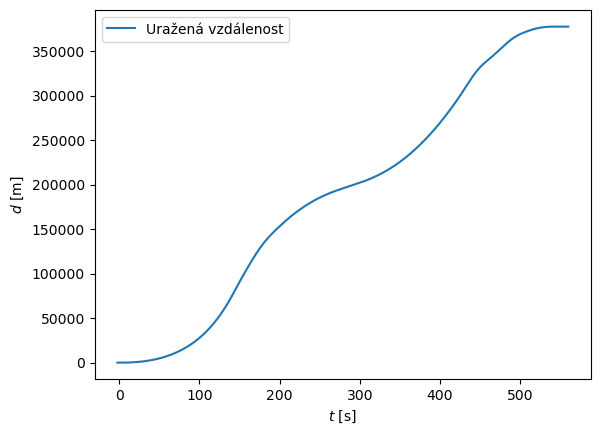

In [5]:
#Graf uražené vzdálenosti v závislosti na čase

plt.plot(telemetry_data["Time"], telemetry_data["Distance"], label = "Uražená vzdálenost")

plt.xlabel("$t$ [s]")
plt.ylabel("$d$ [m]")

plt.legend()

Z našeho snažení vidíme, že raketa za necelých 10 minut dokázala urazit téměř 380 kilometrů! 

## Zrychlení prvního stupně rakety Falcon 9

Zrychlení můžeme vypočítat jako změnu rychlosti $\Delta v$ za nějaký časový interval $\Delta t$ takto

\begin{equation*}
    a = \frac{\Delta v}{\Delta t}.
\end{equation*}

Naše data bohužel nejsou čistá. Když se podiváme na naše data o rychlosti zblízka, tak zjistíme, že naše "rozlišenní" rychlosti je 1 m/s. To bohužel není dost na to, abychom mohli dobře určit zrychlení. Proč? Při pohledu na data jde vidět, že rychlost se na čas zasekne na jedné hodnotě předtím, než se zvýší/sníží. To je právě dáno malým rozlišení rychlosti.

Pomůžeme si tím, že zvětšíme časový interval $\Delta t$ tak, aby během něj zmenila rychlost rakety. Toto zvětšení intervalu dokud se nezmění hodnota rychlosti je implementováno v kódu níže. 

In [6]:
telemetry_data["Acceleration"] = 0      #Vytvoření nového sloupce pro zrychlení
current_speed = 0       #Pomocná proměnná pro současnou rychlost
interval_time = 0       #Délka časového intervalu 
help_index = 0          #Pomocný index, který určuje začátek intervalu

for i in range(1,len(telemetry_data)):      #Vypočtení zrychlení pro jednotlivé prodloužené intervaly
    if telemetry_data.loc[i, "Speed"] == current_speed:
        interval_time += telemetry_data.loc[i, "Time"] - telemetry_data.loc[i-1, "Time"]
    else:
        acc = (telemetry_data.loc[i, "Speed"] - current_speed)/(telemetry_data.loc[i, "Time"] - telemetry_data.loc[help_index, "Time"])
        for j in range(help_index,i):
            telemetry_data.loc[j, "Acceleration"] = acc
        current_speed = telemetry_data.loc[i, "Speed"]
        help_index = i

/tmp/ipykernel_501/87916107.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.22026431718061673' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  telemetry_data.loc[j, "Acceleration"] = acc


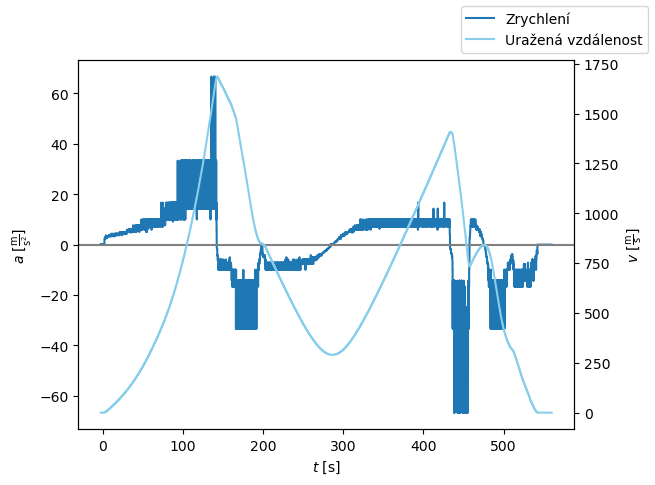

In [7]:
#Graf zrychlení a rychlosti rakety v závislosti na čase 

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(telemetry_data["Time"], telemetry_data["Acceleration"], label = "Zrychlení")
ax2.plot(telemetry_data["Time"], telemetry_data["Speed"], label = "Uražená vzdálenost", c = "skyblue")

ax1.axhline(0, color = "gray")

ax1.set_xlabel("$t$ [s]")
ax1.set_ylabel(r"$a$ [$\frac{\text{m}}{\text{s}^2}$]")
ax2.set_ylabel(r"$v$ [$\frac{\text{m}}{\text{s}}$]")

fig1.legend()

Jak vidíme, náš graf zrychlení není příliš "fyzikálně" vypadající funkce. To je dáno pravě tím, že naše data  o ryhclosti rakety mají nedostatečné rozlišení. Náš graf ale pořád správně ukazuje časové úseky, ve kterých se raketa urychluje (myšleno tak, že se zvětšuje velikost rychlosti) a kdy zpomaluje (zmenšuje se velikost rychlosti).

In [8]:
# Uložení dat k dalšímu zpracování v úloze 2
telemetry_data.to_csv("data_uloha_2.csv", index = False)

### Pomocný obrázek ke "schodům"

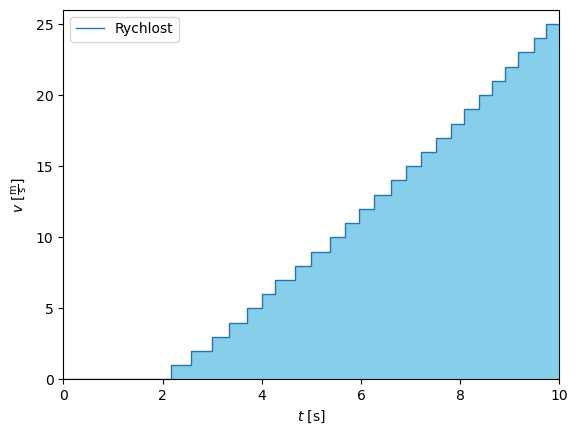

In [9]:
#graf rychlosti v závislosti na čase

plt.stairs(telemetry_data.loc[range(0,400), "Speed"], telemetry_data.loc[range(0,401),"Time"], fill=True, color = "skyblue")
plt.stairs(telemetry_data.loc[range(0,400), "Speed"], telemetry_data.loc[range(0,401),"Time"], label = "Rychlost")
plt.xlabel("$t$ [s]")
plt.ylabel(r"$v$ [$\frac{\text{m}}{\text{s}}$]")

plt.xlim(0,10)
plt.ylim(0,26)

plt.legend()

plt.savefig("01_schody.svg")